
# **Project Topic**: Design of a Processing Architecture for Human Activity Classification Based on Multimodal Data

**Team member:**
- Thibaut LONGCHAMPS
- Emmanuel Jonathan EBONGOM MANYOL

## Data Source Directory Architecture  

<!-- |- 1  

|  ....  

|--25  

    - back  
        - EMG  
        - IMU  
        - IPS  
    - forward  
        - EMG  
        - IMU  
        - IPS  
    - halfsquat  
        - EMG  
        - IMU  
        - IPS  
    - still  
        - EMG  
        - IMU  
        - IPS -->  
Where 1-25 is the index of each participant.  

**Project Goal:** The main objective is to compare a unified architecture (encompassing all modalities) with a multi-modal architecture and evaluate the performance of each model.  

**Data Source:** [MovePort: Multimodal Dataset of EMG, IMU, MoCap, and Insole Pressure for Analyzing Abnormal Movements and Postures in Rehabilitation Training](https://figshare.com/articles/dataset/MovePort_Multimodal_Dataset_of_EMG_IMU_MoCap_and_Insole_Pressure_for_Analyzing_Abnormal_Movements_and_Postures_in_Rehabilitation_Training/25202183?file=46577461)  

**Article Related to the Datasource:** [IEEExplore Article](https://ieeexplore.ieee.org/document/10601196)  

## **1. Data Reading and Formatting**  
- Loading raw data from various sensors.  
- Preparing the data to make it usable by the models, ensuring temporal alignment and synchronization of data from the different modalities.

In [2]:
# Exploratory Data Analysis (EDA) for Four Modalities

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed datasets
data_processed_dir = 'data_processed'
emg_path = f'{data_processed_dir}/emg.csv'
imu_path = f'{data_processed_dir}/imu.csv'
ips_path = f'{data_processed_dir}/ips.csv'
mocap_path = f'{data_processed_dir}/mocap.csv'

# Load datasets
emg_data = pd.read_csv(emg_path)
imu_data = pd.read_csv(imu_path)
ips_data = pd.read_csv(ips_path)
mocap_data = pd.read_csv(mocap_path)

# Combine datasets into a dictionary for easier processing
modalities = {
    'EMG': emg_data,
    'IMU': imu_data,
    'IPS': ips_data,
    'MoCap': mocap_data
}




EMG Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11348420 entries, 0 to 11348419
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   R_Vlat       float64
 1   R_RF         float64
 2   R_ST         float64
 3   R_TA         float64
 4   L_Vlat       float64
 5   L_RF         float64
 6   L_ST         float64
 7   L_TA         float64
 8   R_MG         float64
 9   R_LG         float64
 10  R_SOL        float64
 11  R_IL         float64
 12  L_MG         float64
 13  L_LG         float64
 14  L_SOL        float64
 15  L_IL         float64
 16  participant  int64  
 17  activity     object 
dtypes: float64(16), int64(1), object(1)
memory usage: 1.5+ GB
None
             R_Vlat          R_RF          R_ST          R_TA        L_Vlat  \
count  1.134842e+07  1.134842e+07  1.134842e+07  1.134842e+07  1.134842e+07   
mean  -1.203635e+00 -2.423510e+00 -3.214184e+00 -3.665307e+00 -1.253110e+00   
std    5.069067e+01  3.265821e+01  2.0

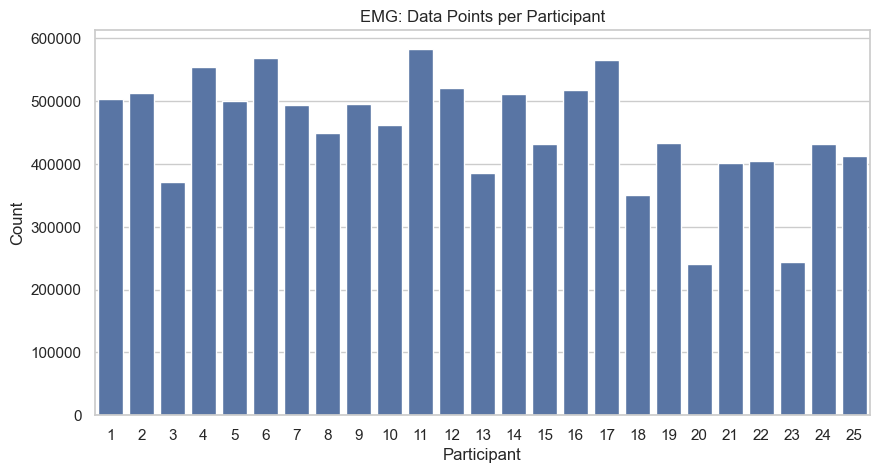

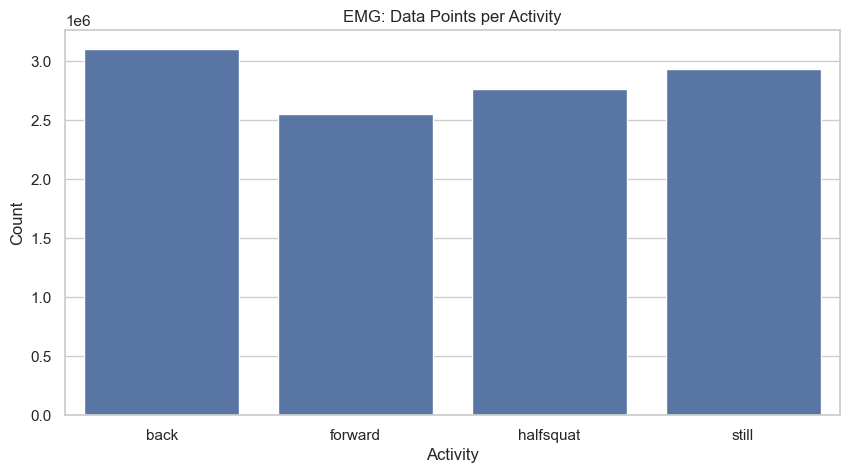

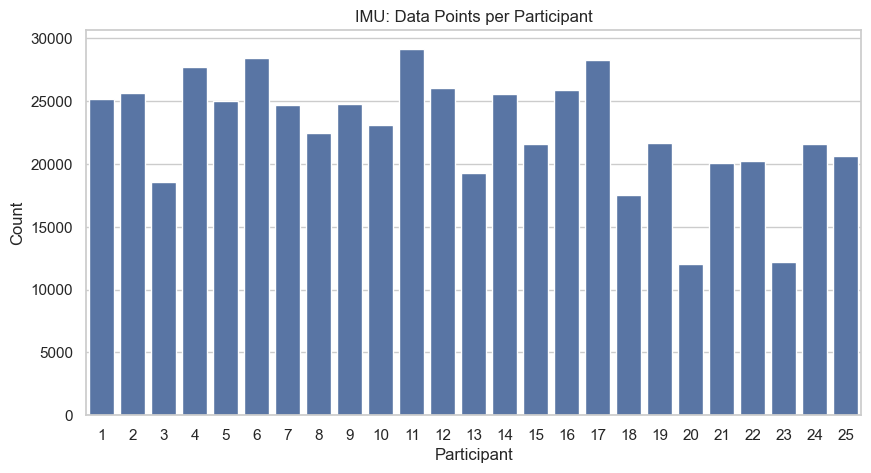

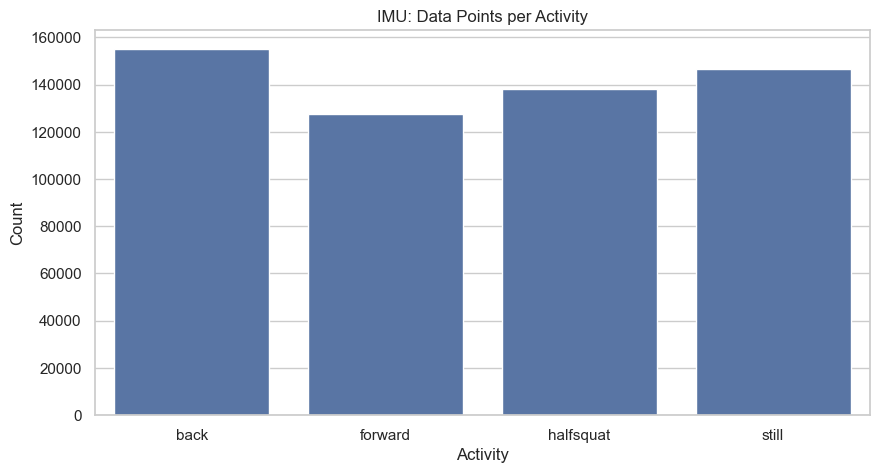

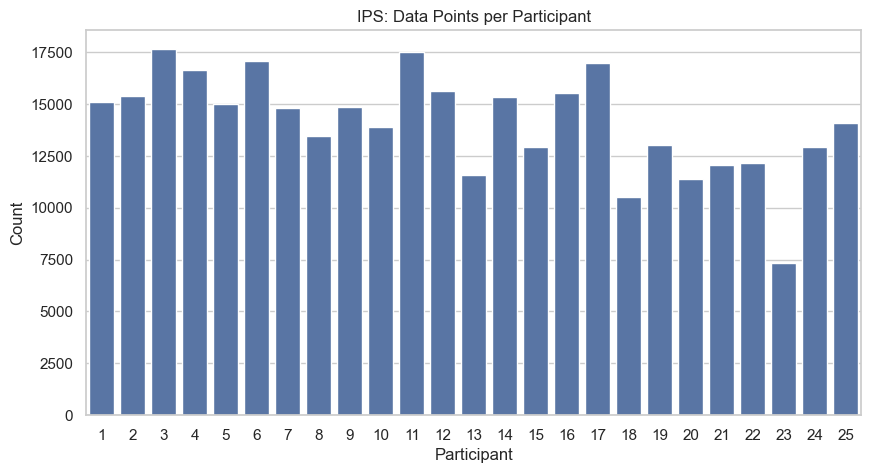

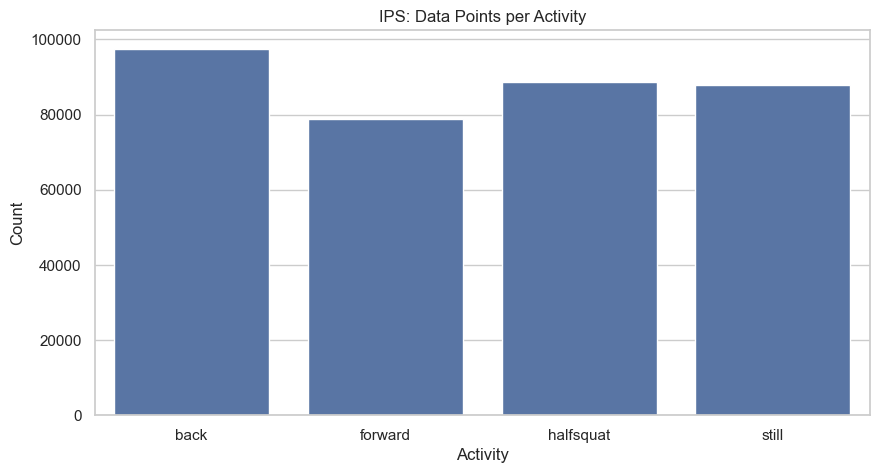

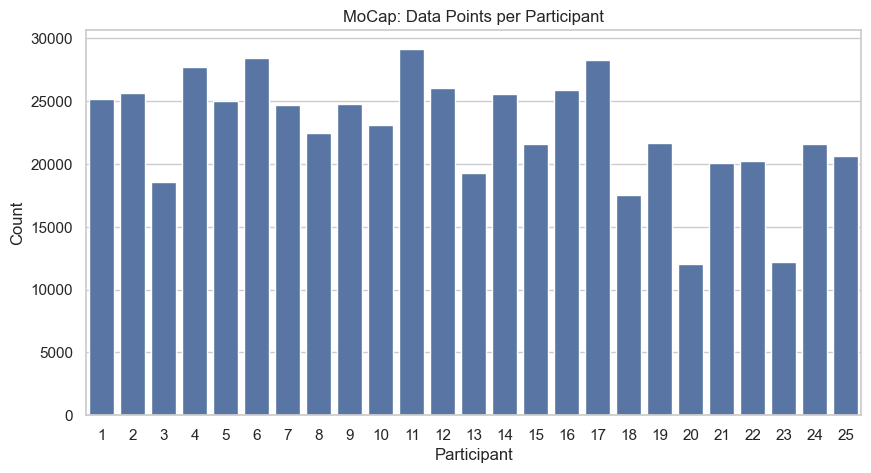

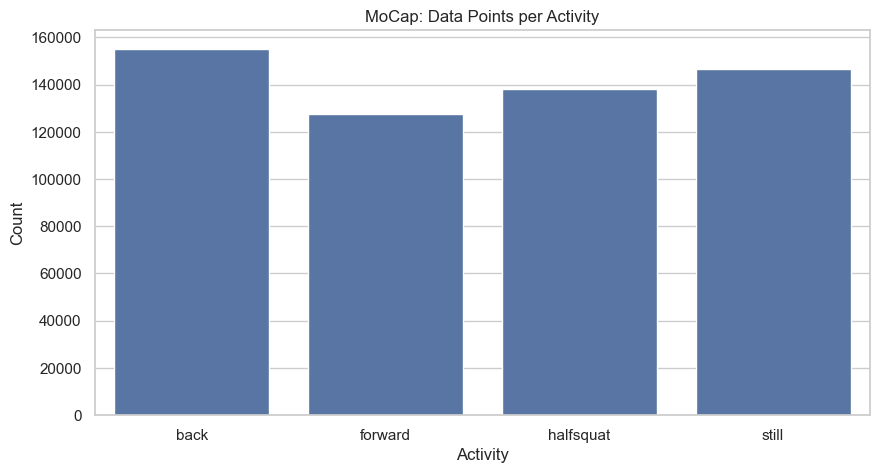

In [3]:
# Summary statistics and data overview
for modality, data in modalities.items():
    print(f"\n{modality} Dataset Summary:")
    print(data.info())
    print(data.describe())
    print(f"\nMissing values per column:")
    print(data.isnull().sum())

# Visualizations
sns.set(style="whitegrid")

# Plot distribution of data points per participant and activity
for modality, data in modalities.items():
    if 'participant' in data.columns and 'activity' in data.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=data, x='participant', order=sorted(data['participant'].unique()))
        plt.title(f"{modality}: Data Points per Participant")
        plt.xlabel("Participant")
        plt.ylabel("Count")
        plt.show()

        plt.figure(figsize=(10, 5))
        sns.countplot(data=data, x='activity', order=sorted(data['activity'].unique()))
        plt.title(f"{modality}: Data Points per Activity")
        plt.xlabel("Activity")
        plt.ylabel("Count")
        plt.show()



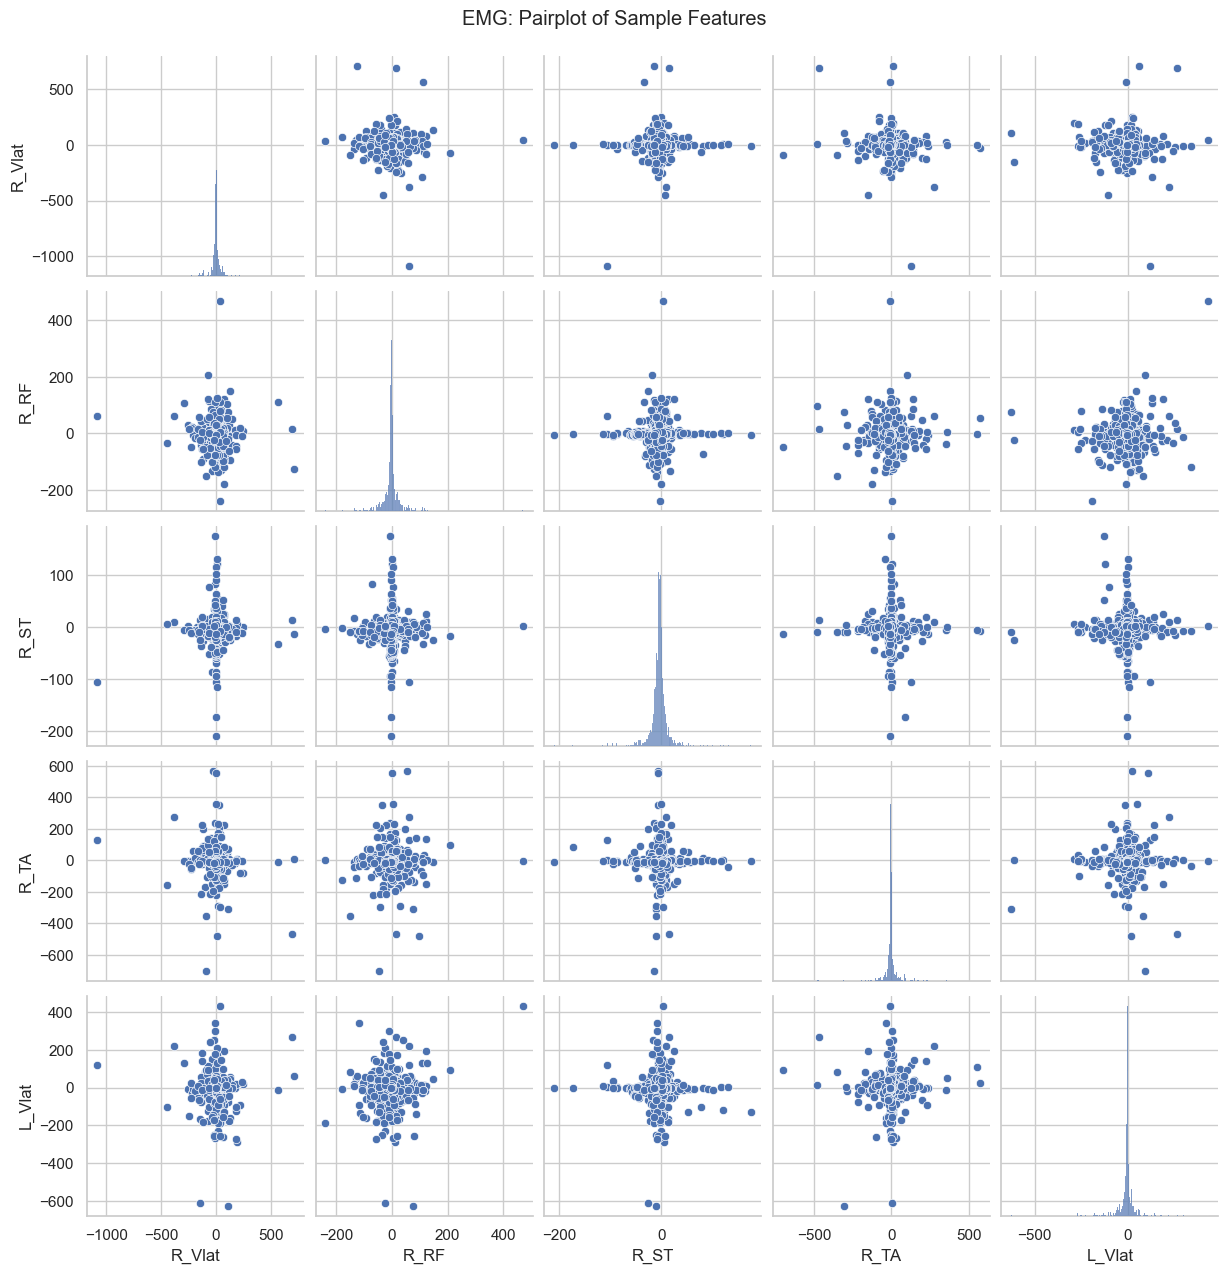

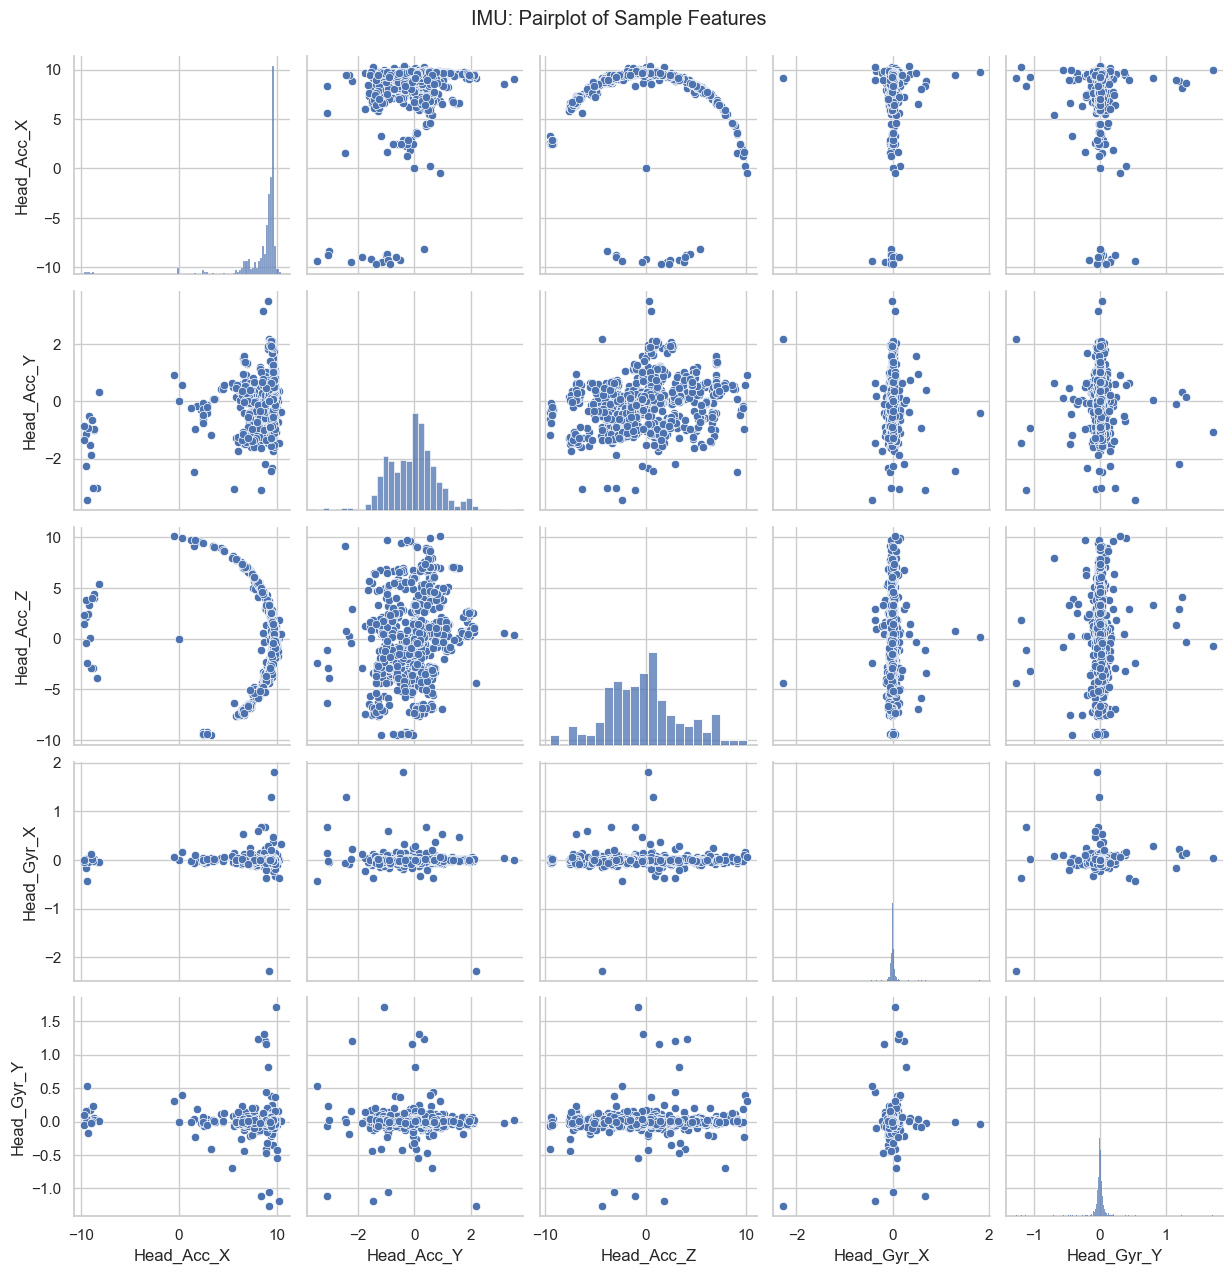

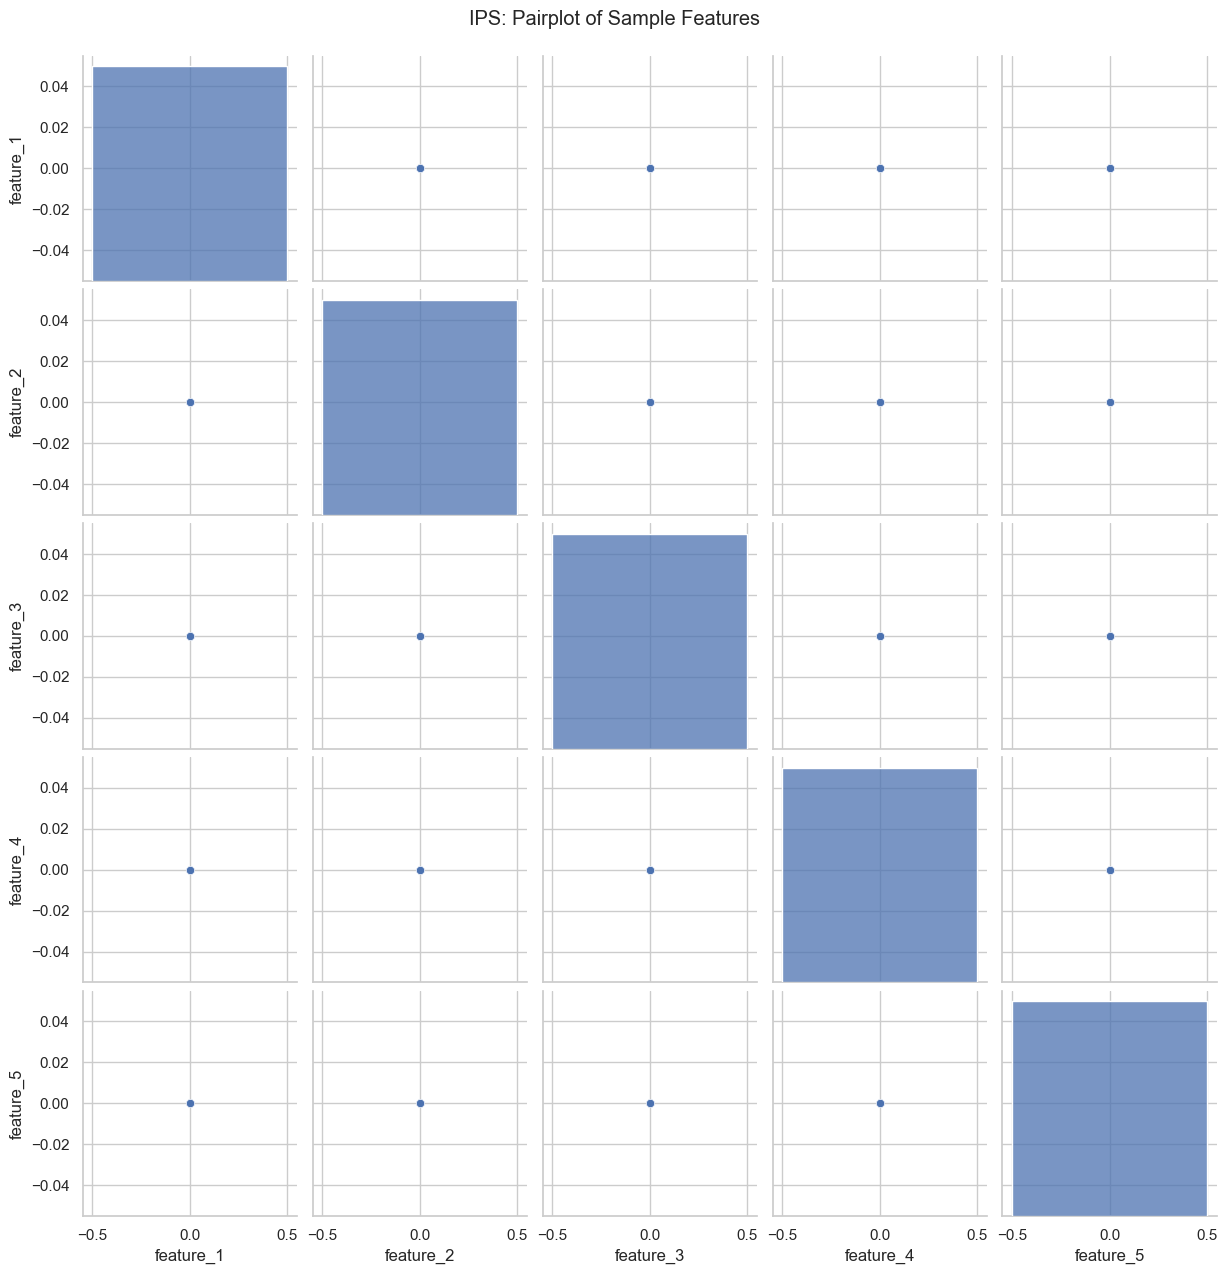

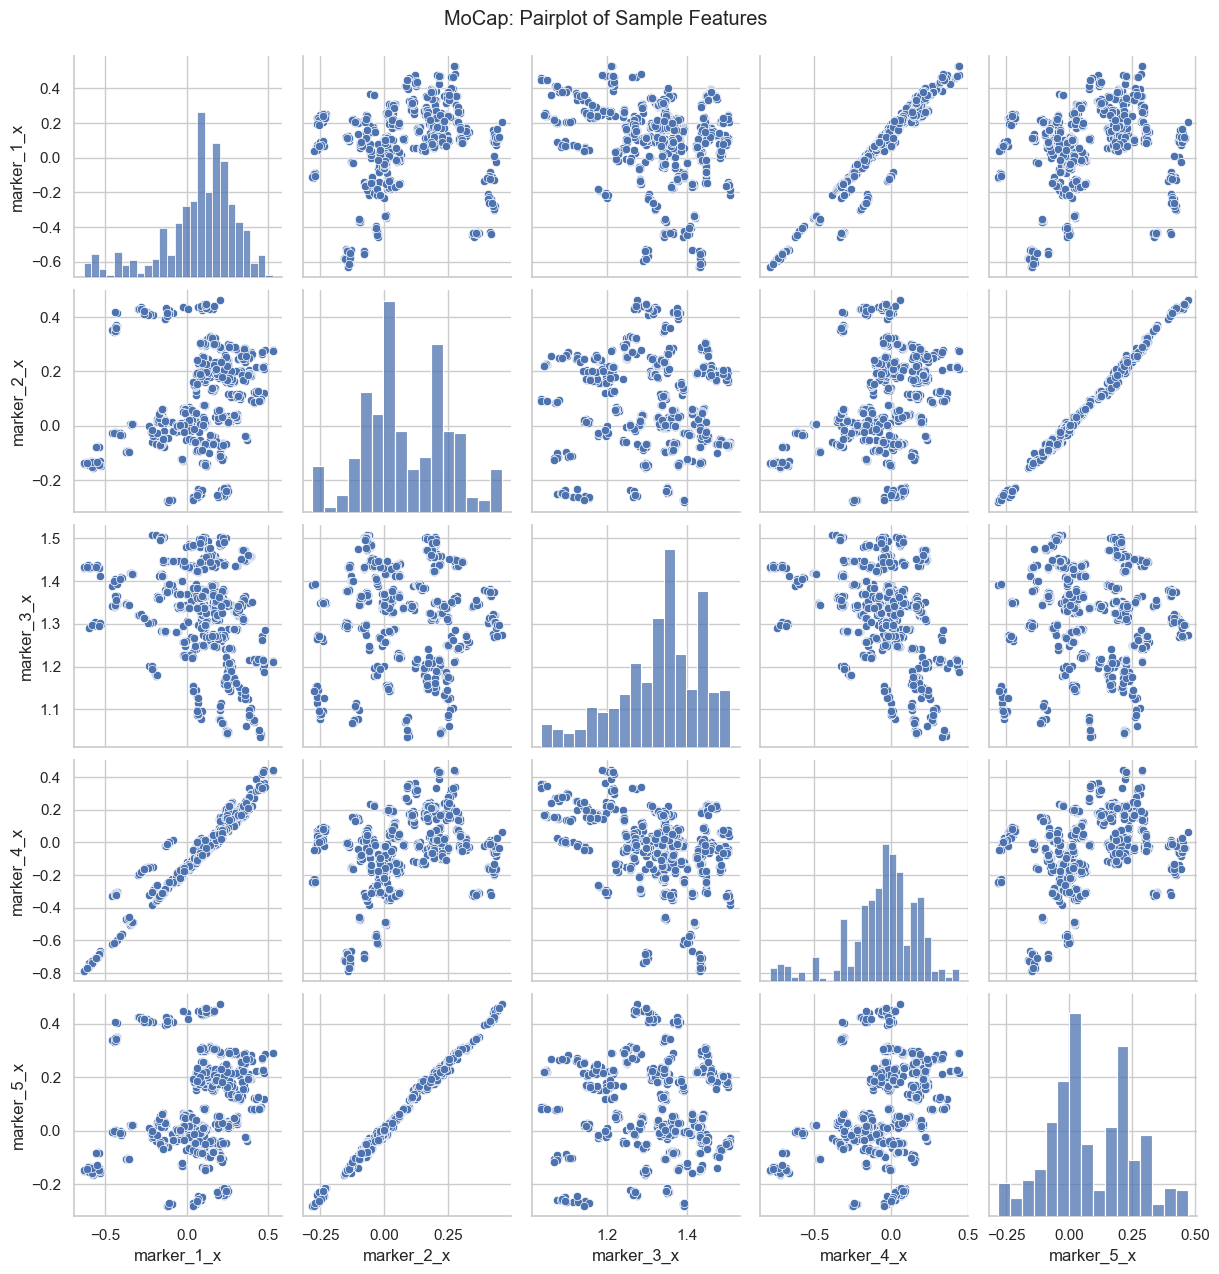

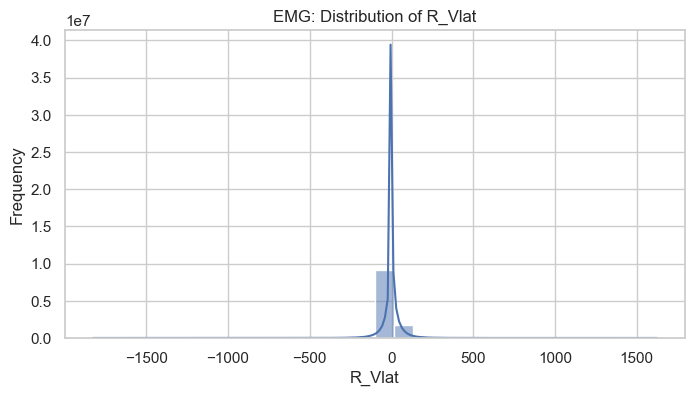

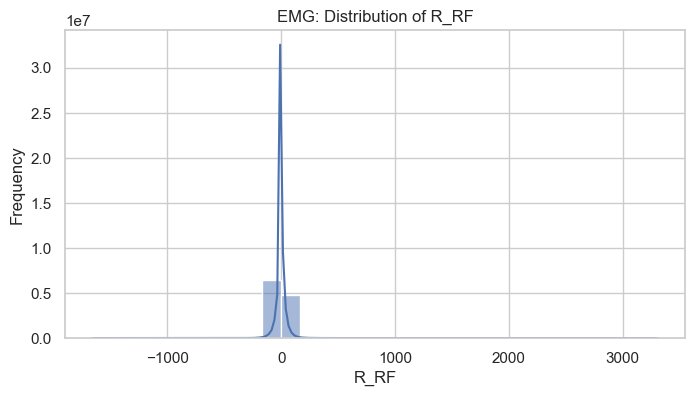

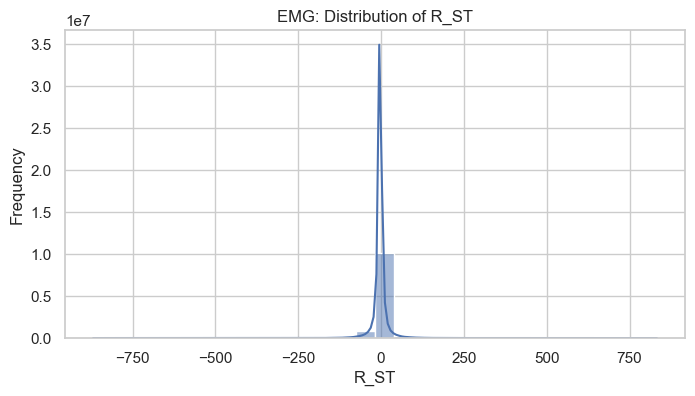

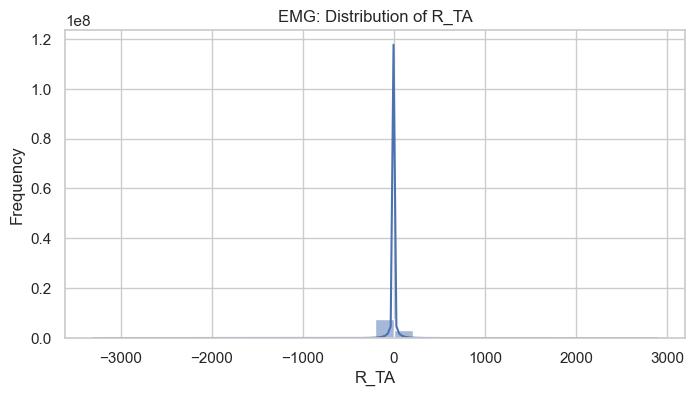

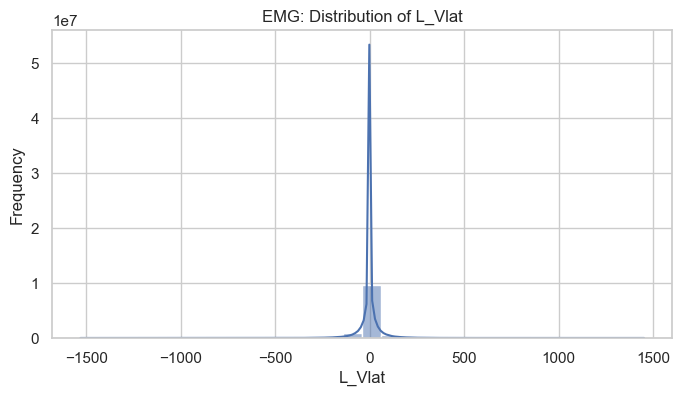

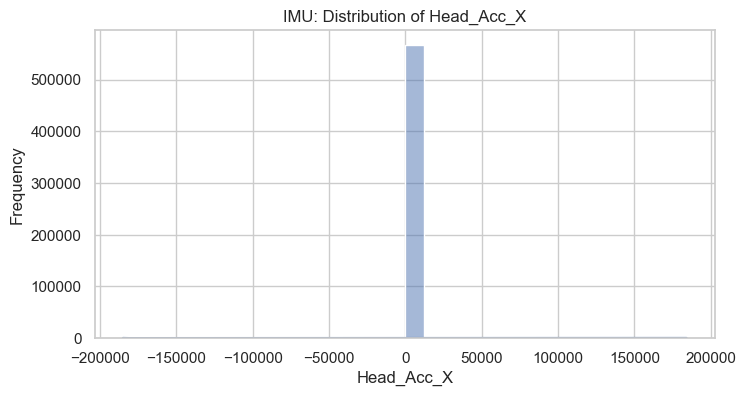

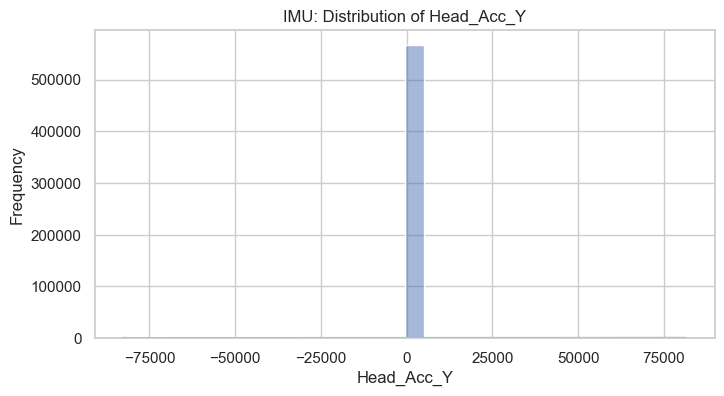

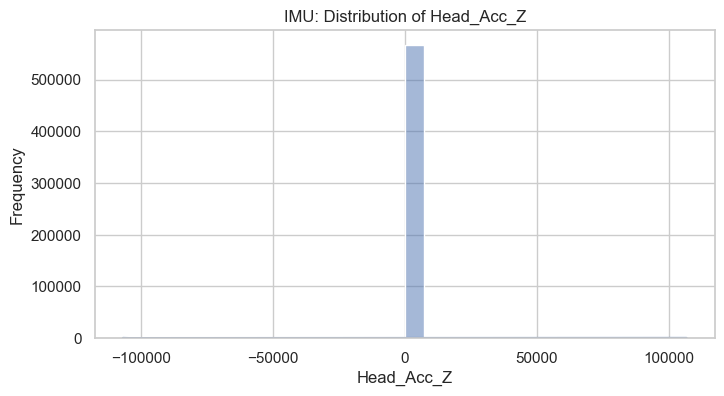

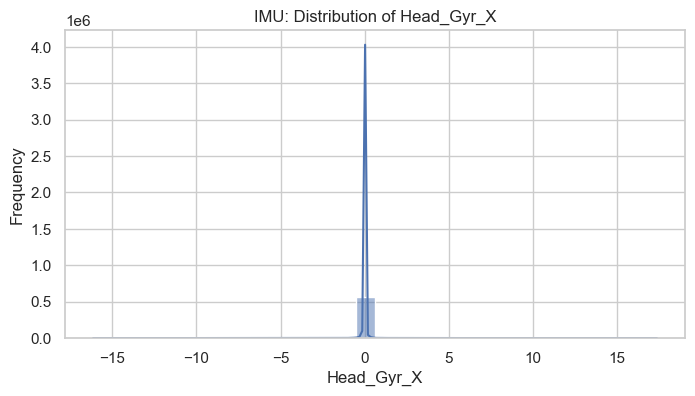

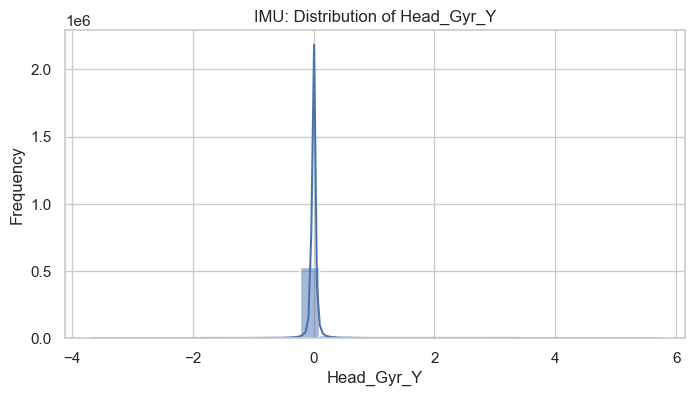

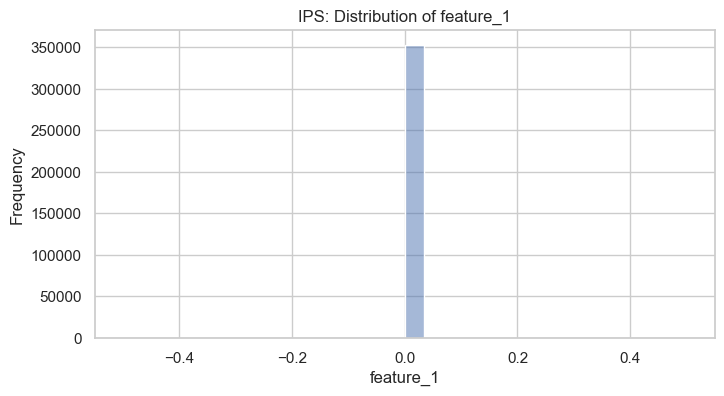

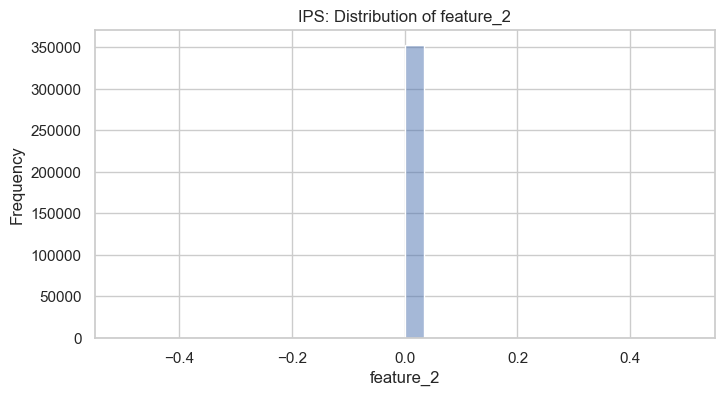

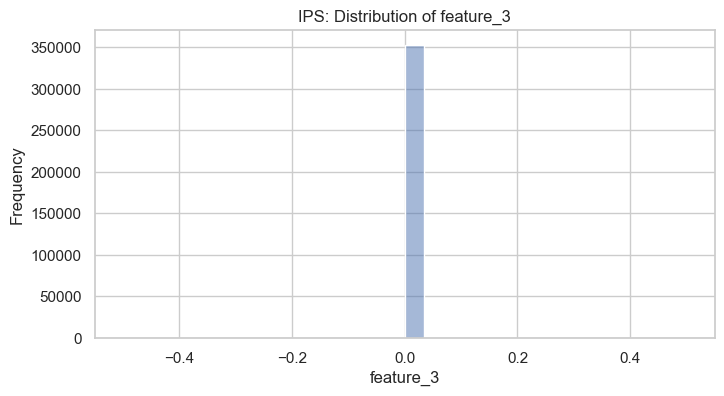

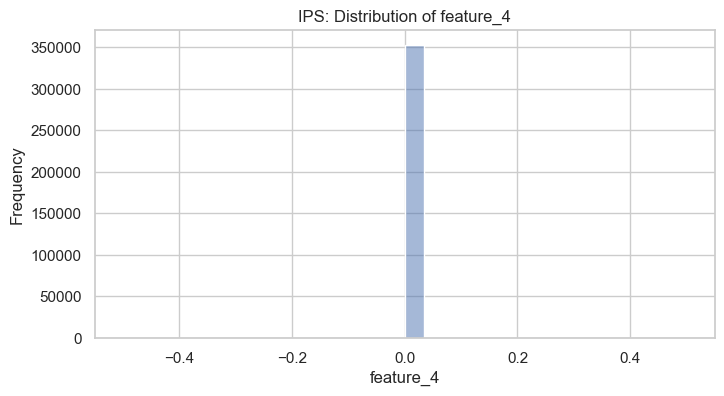

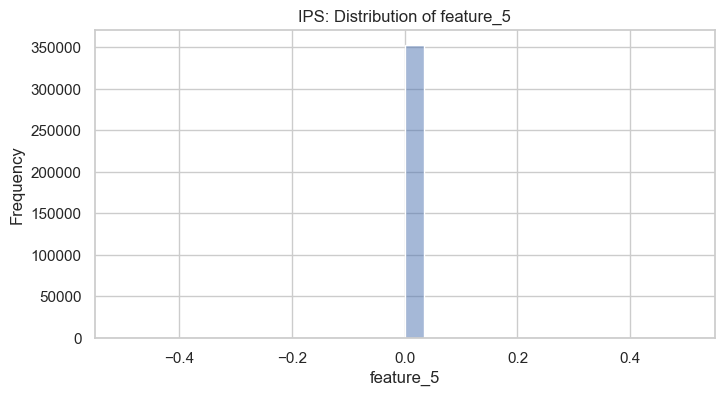

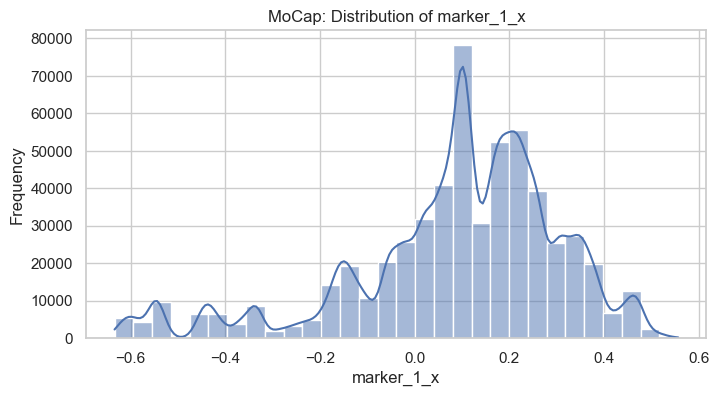

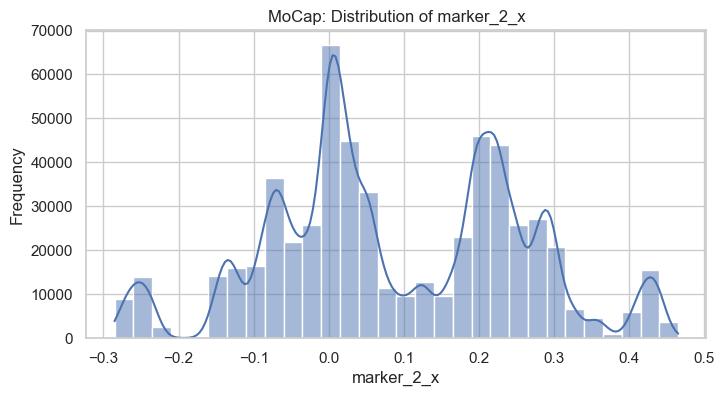

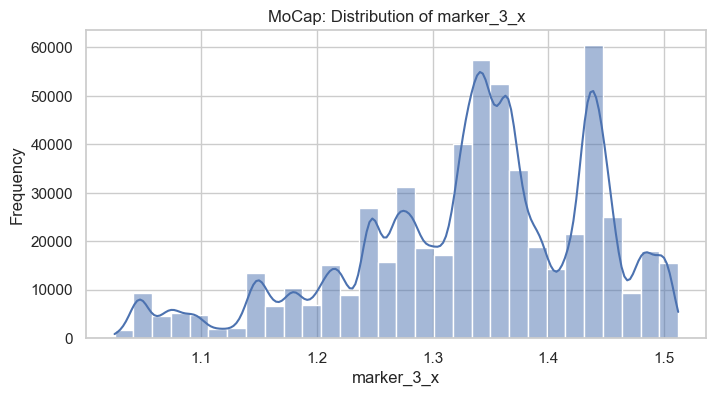

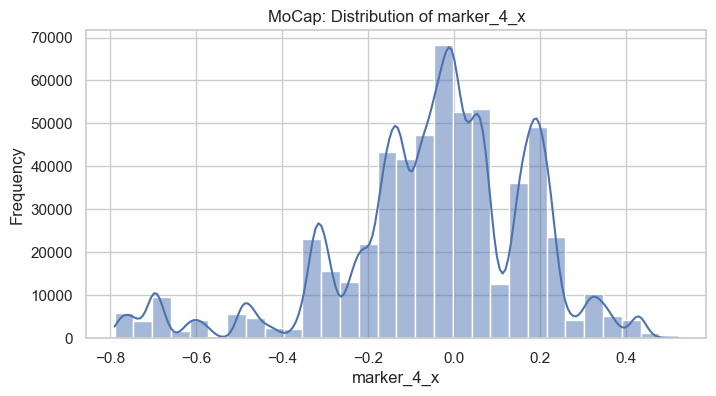

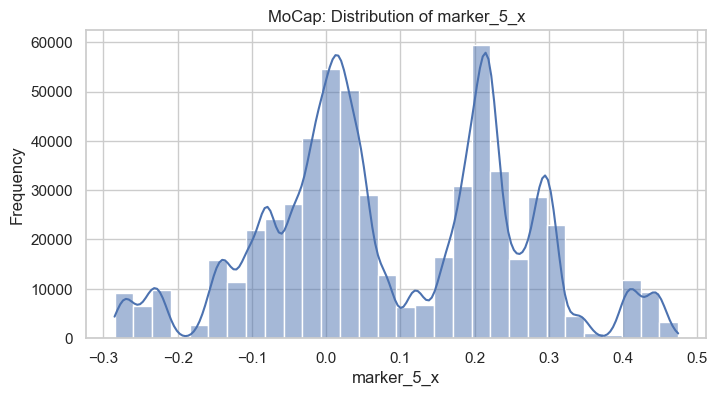

In [5]:
# Pairplot for correlation analysis (small subsets of features for clarity)
for modality, data in modalities.items():
    features = sample_features.get(modality, [])
    if not features.empty:  # Fix: Check if the Index is not empty
        subset = data[features].sample(n=min(1000, len(data)))  # Take a sample if the dataset is too large
        sns.pairplot(subset)
        plt.suptitle(f"{modality}: Pairplot of Sample Features", y=1.02)
        plt.show()

# Feature distribution visualization for each modality
for modality, data in modalities.items():
    features = sample_features.get(modality, [])
    if not features.empty:  # Fix: Check if the Index is not empty
        for feature in features:
            plt.figure(figsize=(8, 4))
            sns.histplot(data[feature], kde=True, bins=30)
            plt.title(f"{modality}: Distribution of {feature}")
            plt.xlabel(feature)
            plt.ylabel("Frequency")
            plt.show()


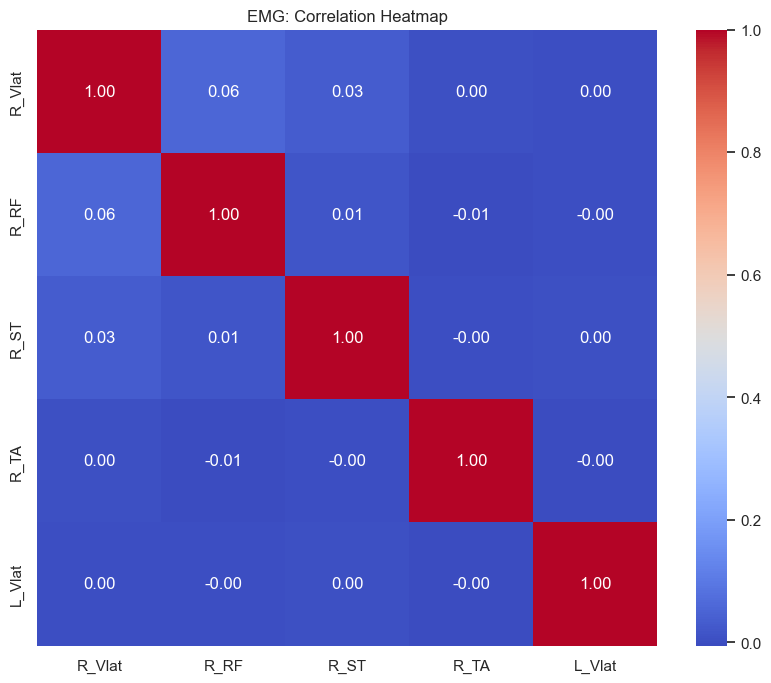

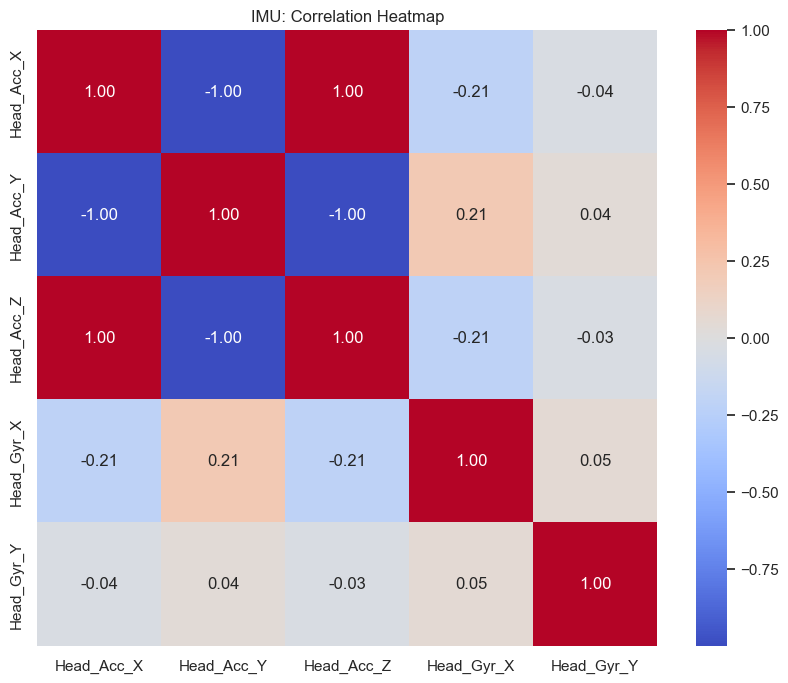

/Users/jonathan/Documents/École/Paris 8/S1/Architectures de traitement complexes/atc_env/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/jonathan/Documents/École/Paris 8/S1/Architectures de traitement complexes/atc_env/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


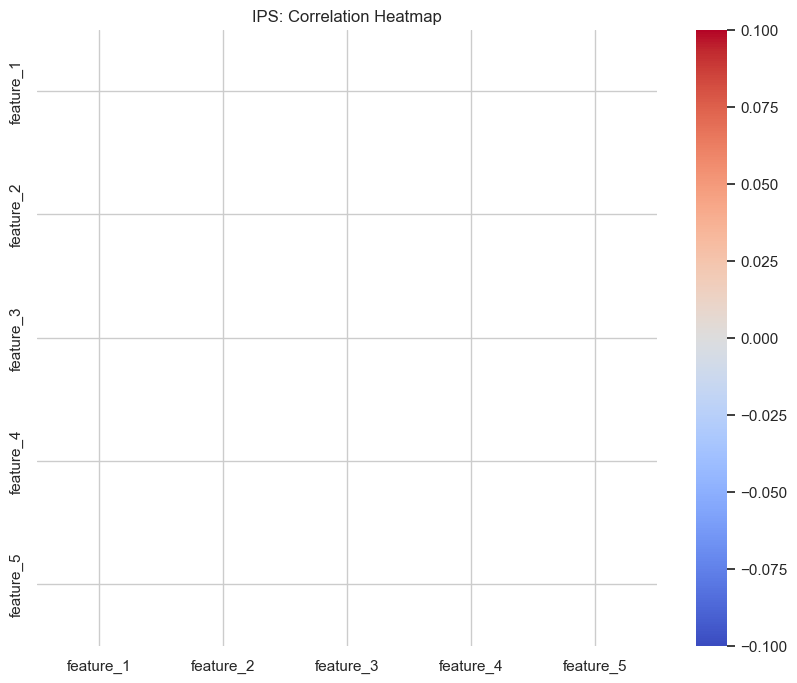

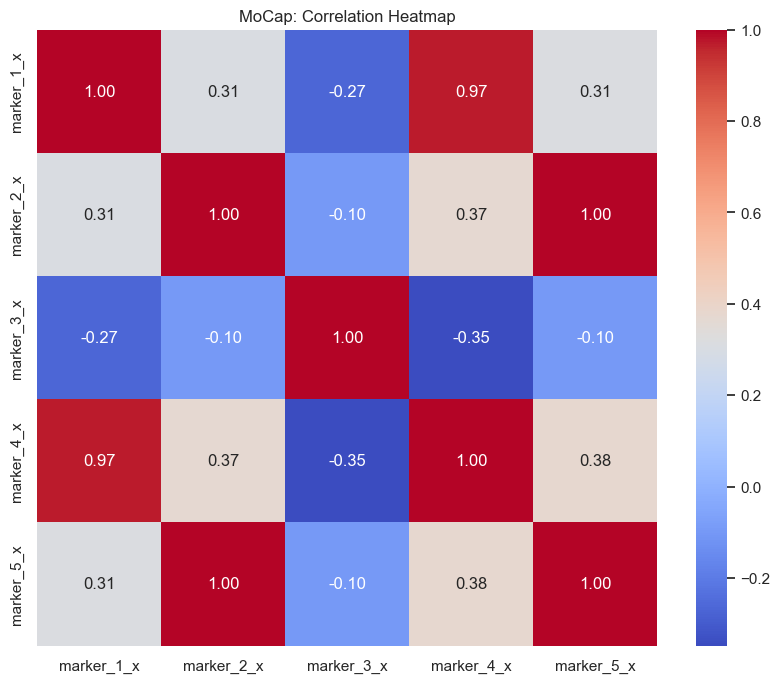

EDA complete for all modalities.


In [7]:
# Correlation heatmap for sampled features
for modality, data in modalities.items():
    features = sample_features.get(modality, [])
    if not features.empty:  # Fix: Check if the Index is not empty
        plt.figure(figsize=(10, 8))
        sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"{modality}: Correlation Heatmap")
        plt.show()

print("EDA complete for all modalities.")


## EDA Conclusion

Globally speaking: 

- It seems like while some modatily carry a strong correlation between their features, others do not seem to display any kind of relationship.
- most of the time certain we saw that modalities where left-skewed and did have 2 common exercises 
- The value range is very large for the EMG and IMU sensors; normalization or standardization might be necessary before including them in the model. The large amplitudes of the data increase the likelihood that extreme values will significantly influence the model.

- Mocap/IMU (heatmap) : The strong correlations that we observed indicate that we can apply dimensionality reduction techniques like PCA to effectively reduce redundancy

- EMG (heatmap) The muscles operate independently, so we should treat each signal as a separate source and models that can handle complicated relationships are better

- The labels are relatively balanced across each class, so the use of data generation methods will not be necessary

- Data imbalance between participants: can cause bias in the evaluation of the model for LOGO method, which may not be representative if the test set is less diverse or less balanced in terms of data.

Consequence: 
1. reduced performance in detecting variations in movements in the test set
2. Loss of robustness in generalisation
3. Increase in variance in the metrics
